# A Simple Introduction to Web Scraping with Beautiful Soup

![](https://github.com/kaopanboonyuen/GISTDA2023/raw/main/img/gistda_day1.png)


Credit: 

[1] https://realpython.com/beautiful-soup-web-scraper-python/

[2] https://www.analyticsvidhya.com/blog/2021/08/a-simple-introduction-to-web-scraping-with-beautiful-soup/

[3] https://www.scrapingbee.com/blog/python-web-scraping-beautiful-soup/

# API Scraping using Twitter

![](https://www.techbooky.com/wp-content/uploads/2021/11/twitter-api.jpeg)

# IMPORT LIBS

In [1]:
!pip install -q snscrape
!pip install -q pythainlp
!pip install -q pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.2 MB/s eta 0:00:00


# DOWNLOAD THAI FONT FOR WORD CLOUD PLOT

In [2]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import pythainlp
from pythainlp.tokenize import word_tokenize
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
def thai_tokenizer(sentence):
    return word_tokenize(sentence, engine='newmm')

def remove_url(text):
    urlPattern = "((https?|ftp|gopher|telnet|file|Unsure|http):((//)|(\\\\))+[\\w\\d:#@%/;$()~_?\\+-=\\\\\\.&]*)"
    text = re.sub(urlPattern, '', text)
    return text

def remove_rt(text):
    text = re.sub('^rt @[\\w]*: ', '', text).strip()
    return text

def remove_at(text):
    text = re.sub('@[\\w]*', '', text).strip()
    return text

def clean_text(text):
    text = text.lower().replace('\n', '').replace('\t', '')
    text = remove_url(text)
    text = remove_rt(text)
    text = remove_at(text)
    text = (text
            .replace(':', ' ')
            .replace(',', ' ')
            .replace('!', ' ')
            .replace('#', ' ')
            .replace('(', ' ')
            .replace(')', ' ')
            .replace('"', ' ')
            .replace("'", ' ')
            .replace('?', ' ')
            .replace('”', ' ')
            .replace("’", ' ')
           )
    text = re.sub(' +', ' ', text)
    text = re.sub('\.+', '\.', text)
    text = text.strip()
    
    return text

# TWITTER SCRAPING USING SNTWITTER WITH YOUR KEYWORD

In [23]:
# Set up the search query
search_term = "ลุงตู่"
since_date = "2022-01-01"
until_date = "2023-01-31"
#geocode = "13.736717,100.523186, 50km" # search within 50 miles of bangkok

# Setting variables to be used below
maxTweets = 500

# Creating list to append tweet data to
tweets_list = []

# create the search query
query = f"{search_term} since:{since_date} until:{until_date}"

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):    
    if i > maxTweets:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

<ipython-input-23-d27afc1f7eab>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])
<ipython-input-23-d27afc1f7eab>:20: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])


In [24]:
# Creating a dataframe from the tweets list above
df = pd.DataFrame(tweets_list, columns=['datetime', 'tweet id', 'text', 'username'])

In [25]:
df.head()

,datetime,tweet id,text,username
0,2023-01-30 15:20:29+00:00,1620079509126135810,@jieng2019 ซุปเปอร์ไฮเวย์เชียงใหม่-ลำพูน 6 เลน...,jitkasame
1,2023-01-30 15:18:42+00:00,1620079063200325632,ถ้าใครไปเชียงราย-เชียงของ-เชียงแสน ถนนเลียบแม่...,jitkasame
2,2023-01-30 15:16:10+00:00,1620078424399417349,@kirin_alicha @Kea_New เลือกทั้งบ้านแน่นอนครับ...,GiJOE2538
3,2023-01-30 15:11:23+00:00,1620077218209878017,เหนื่อยหน่อยนะ อยู่กับฉัน\nเมื่อสิ่งที่ฝันนั้น...,NuuNuu_Official
4,2023-01-30 15:01:33+00:00,1620074745516658691,#ลุงตู่ บอกที่ทนอยู่ต่อ เพราะรักประชาชน \nคนไท...,31102551


In [26]:
df['clean_text'] = df['text'].apply(clean_text)
df

,datetime,tweet id,text,username,clean_text
0,2023-01-30 15:20:29+00:00,1620079509126135810,@jieng2019 ซุปเปอร์ไฮเวย์เชียงใหม่-ลำพูน 6 เลน...,jitkasame,ซุปเปอร์ไฮเวย์เชียงใหม่-ลำพูน 6 เลน สะพานลอย อ...
1,2023-01-30 15:18:42+00:00,1620079063200325632,ถ้าใครไปเชียงราย-เชียงของ-เชียงแสน ถนนเลียบแม่...,jitkasame,ถ้าใครไปเชียงราย-เชียงของ-เชียงแสน ถนนเลียบแม่...
2,2023-01-30 15:16:10+00:00,1620078424399417349,@kirin_alicha @Kea_New เลือกทั้งบ้านแน่นอนครับ...,GiJOE2538,เลือกทั้งบ้านแน่นอนครับงวดนี้ บอกทางบ้านแล้วที...
3,2023-01-30 15:11:23+00:00,1620077218209878017,เหนื่อยหน่อยนะ อยู่กับฉัน\nเมื่อสิ่งที่ฝันนั้น...,NuuNuu_Official,เหนื่อยหน่อยนะ อยู่กับฉันเมื่อสิ่งที่ฝันนั้นมั...
4,2023-01-30 15:01:33+00:00,1620074745516658691,#ลุงตู่ บอกที่ทนอยู่ต่อ เพราะรักประชาชน \nคนไท...,31102551,ลุงตู่ บอกที่ทนอยู่ต่อ เพราะรักประชาชน คนไทยคว...
...,...,...,...,...,...
496,2023-01-13 09:04:02+00:00,1613824177773084672,#ลุงตู่ งอล เด็ก​เรียกชื่อผิด🤣🤣🤣🤣🤣,Gum_paa22,ลุงตู่ งอล เด็ก​เรียกชื่อผิด🤣🤣🤣🤣🤣
497,2023-01-13 08:23:28+00:00,1613813971471171584,คงต้องเป็นแบบนั้น!!\n‘ส.ว.เสรี’ รับ กมธ.ส.ว. ช...,31102551,คงต้องเป็นแบบนั้น ‘ส\.ว\.เสรี รับ กมธ\.ส\.ว\. ...
498,2023-01-13 08:16:18+00:00,1613812167744315395,คลิกอ่านข่าว : https://t.co/lCwIRK94hY\n\nลุงต...,naewna_news,คลิกอ่านข่าว ุงตู่อารมณ์ดี ทักลูกนักข่าวทำเนีย...
499,2023-01-13 08:14:14+00:00,1613811647503806464,ผลงานการพัฒนาบ้านเมืองทั่วประเทศ ถ้าตาไม่มืดใจ...,toeyza3702,ผลงานการพัฒนาบ้านเมืองทั่วประเทศ ถ้าตาไม่มืดใจ...


In [27]:
df[['text', 'clean_text']].head(3)

,text,clean_text
0,@jieng2019 ซุปเปอร์ไฮเวย์เชียงใหม่-ลำพูน 6 เลน...,ซุปเปอร์ไฮเวย์เชียงใหม่-ลำพูน 6 เลน สะพานลอย อ...
1,ถ้าใครไปเชียงราย-เชียงของ-เชียงแสน ถนนเลียบแม่...,ถ้าใครไปเชียงราย-เชียงของ-เชียงแสน ถนนเลียบแม่...
2,@kirin_alicha @Kea_New เลือกทั้งบ้านแน่นอนครับ...,เลือกทั้งบ้านแน่นอนครับงวดนี้ บอกทางบ้านแล้วที...


In [28]:
df['tokens'] = df['clean_text'].apply(word_tokenize)

tokens = df.explode('tokens')
word_count = tokens['tokens'].value_counts()

In [29]:
word_count.sort_values(ascending=False)

            4808
ลุง         1093
ตู่         1035
ไทย          593
รวม          445
            ... 
กรุ๊ป          1
เป็นที่        1
เหตุ           1
เป้าหมาย       1
มองเห็น        1
Name: tokens, Length: 2893, dtype: int64

# FLATTEN LIST

In [30]:
flat_list = [item for sublist in df['tokens'].tolist()  for item in sublist]

In [31]:
word = []
for i in flat_list:
  if ' ' not in i:
    word.append(i)

# WORD CLOUD PLOT

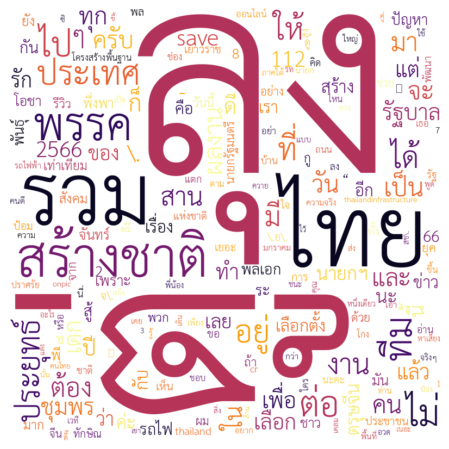

In [32]:
# Create sample data
data = {'text': word}

# Convert data to pandas DataFrame
df_wc = pd.DataFrame(data)

# Get word frequencies using value_counts() method
word_freq = df_wc['text'].value_counts()

# Create word cloud object
wordcloud = WordCloud(font_path='THSarabunChula-Regular.ttf',width=800, height=800, background_color='white', colormap='inferno').generate_from_frequencies(word_freq)

# Display the generated wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()